In [133]:
import matplotlib.pyplot as plt #Libraries for visualization
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
import numpy as np #Library for numerical calculations
from scipy import stats #Library for statistical analysis
from sklearn import datasets #Libraries for machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [82]:
def get_dataset(file_path):
    data = []
    with open(file_path) as file:
        for line in file.readlines():
            data.append(line[:-1].split(","))
    while len(data) == 0:
        pass
    return data

In [144]:
# SEX will be M = 0, F = 1, I = 2
atr_names = ["sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight",
             "Viscera weight", "Shell weight"]
num_abalone_features = len(atr_names)
np_abalone = np.loadtxt(open("../data/abalone-aging/abalone.data"),delimiter=",",dtype=np.object)
abalone_x = np_abalone[:,:-1]
index = 0
for atr_row in abalone_x:
    temp_float = atr_row[1:].astype(np.float)
    num_sex = 0
    if atr_row[0] == "F":
        num_sex = 1
    elif atr_row[0] == "I":
        num_sex = 2
    # temp_str = np.array(atr_row[0])
    tmp = np.empty((0,8), dtype=np.object)
    tmp = np.append(tmp, np.array(num_sex))
    tmp = np.append(tmp, temp_float)
    abalone_x[index] = tmp
    index += 1
print("attributes:", abalone_x)
abalone_y = np_abalone[:,-1]
abalone_y_class = np.array(abalone_y, copy=True)
abalone_y_class[abalone_y.astype(np.int) < 9] = "1-8"
abalone_y_class[np.logical_or(9 == abalone_y.astype(np.int),abalone_y.astype(np.int) ==10)] = "9 or 10"
abalone_y_class[abalone_y.astype(np.int) > 10] = "11+"
abalone_y = abalone_y[:].astype(np.int)
abalone_y_class_int = np.array(abalone_y, copy=True)
abalone_y_class_int[abalone_y < 9] = 0
abalone_y_class_int[np.logical_or(9 == abalone_y,abalone_y ==10)] = 1
abalone_y_class_int[abalone_y > 10] = 2
print(abalone_y_class_int)
abalone_classes = np.unique(abalone_y_class)
print(abalone_classes)
print("targets:", abalone_y_class)

attributes: [[0 0.455 0.365 ... 0.2245 0.101 0.15]
 [0 0.35 0.265 ... 0.0995 0.0485 0.07]
 [1 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 [0 0.6 0.475 ... 0.5255 0.2875 0.308]
 [1 0.625 0.485 ... 0.531 0.261 0.296]
 [0 0.71 0.555 ... 0.9455 0.3765 0.495]]
[2 0 1 ... 1 1 2]
['1-8' '11+' '9 or 10']
targets: ['11+' '1-8' '9 or 10' ... '9 or 10' '9 or 10' '11+']


In [163]:
# without numpy arrays
dataset_abalone = get_dataset("../data/abalone-aging/abalone.data")
# Pandas dataframe with seaborn
np_abalone = np.loadtxt(open("../data/abalone-aging/abalone.data"),delimiter=",",dtype=np.object)
atr_list = []
np_abalone[:, -1] = abalone_y_class_int
print(np_abalone[:, -1])
for atr_col in np_abalone.T:
    atr_list.append(pd.Series(atr_col))
frame_abalone = {}
for atr_name, atr_col in zip(atr_names + ['age'], atr_list):
    frame_abalone[atr_name] = atr_col
df_abalone = pd.DataFrame(frame_abalone)
abalone_dict = { 'values': [], 'target': []}
for ab_case in dataset_abalone:
    ab_case = [ab_case[0]] + [float(s) for s in ab_case[1:]]
    abalone_dict['values'].append(ab_case[:-1])
    abalone_dict['target'].append(ab_case[-1])
print("Num of classes is {}".format(len(np.unique(abalone_dict['target']))))

[2 0 1 ... 1 1 2]
Num of classes is 28


In [85]:
dataset = datasets.load_iris()
dic_iris = {'atr': dataset.data, 'target': dataset.target}
names = dataset.feature_names
target_names = dataset.target_names
noFeatures = len(names)
noTargets = len(dic_iris['target'])
print(noTargets)
print(noFeatures)


150
4


In [131]:
#Setting plotting parameters, not usually needed (we can go with default values)
colors = ['navy', 'turquoise', 'darkorange']

(4177, 8)


C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:306: UserWarning

C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `

C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `

C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureW

C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureW

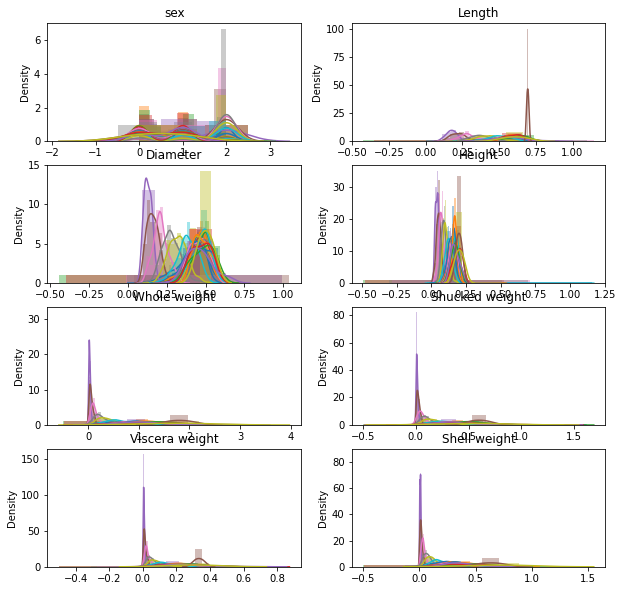

In [87]:
# Visualization
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=2, ncols=2)
print(abalone_x.shape)
for atr_i in range(len(atr_names)):
    if atr_i == 0:
        # make values mapped to letters for SEX
        pass
    ax = plt.subplot(4, 2, atr_i+1)
    plt.title(atr_names[atr_i])
    sns.distplot(abalone_x[:,atr_i])
    for class_i in range(len(np.unique(abalone_y))):
#         in description it says classes + 1.5 gets us the age
        sns.distplot(abalone_x[abalone_y == class_i, atr_i], label=np.unique(abalone_y)[class_i])
plt.show()

(4177, 8)


C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HS-Rn7\anaconda3\envs\kolokvium\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

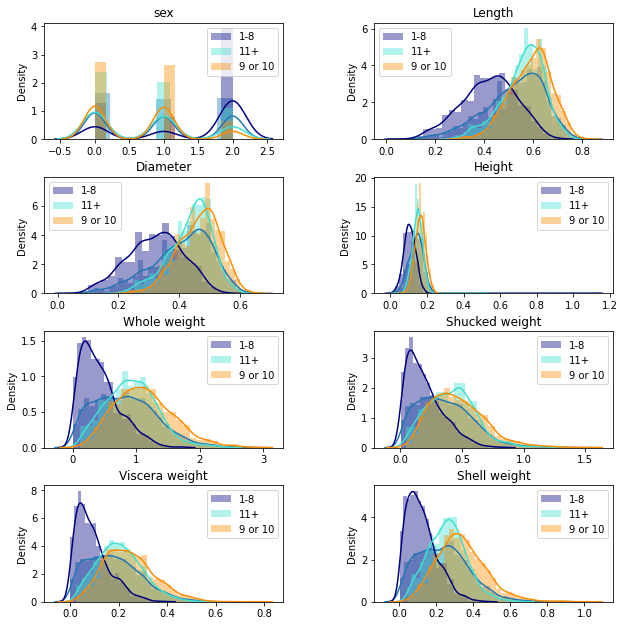

In [147]:
# Visualization
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=6)
print(abalone_x.shape)
for atr_i in range(len(atr_names)):
    if atr_i == 0:
        # make values mapped to letters for SEX
        pass
    ax = plt.subplot(4, 2, atr_i+1)
    plt.title(atr_names[atr_i])
    sns.distplot(abalone_x[:,atr_i])
    for class_i in range(len(abalone_classes)):
#         in description it says classes + 1.5 gets us the age
        sns.distplot(abalone_x[abalone_y_class_int == class_i, atr_i],color=colors[class_i], label=abalone_classes[class_i])
    plt.legend()
plt.show()

     sex Length Diameter Height Whole weight Shucked weight Viscera weight  \
0      M  0.455    0.365  0.095        0.514         0.2245          0.101   
1      M   0.35    0.265   0.09       0.2255         0.0995         0.0485   
2      F   0.53     0.42  0.135        0.677         0.2565         0.1415   
3      M   0.44    0.365  0.125        0.516         0.2155          0.114   
4      I   0.33    0.255   0.08        0.205         0.0895         0.0395   
...   ..    ...      ...    ...          ...            ...            ...   
4172   F  0.565     0.45  0.165        0.887           0.37          0.239   
4173   M   0.59     0.44  0.135        0.966          0.439         0.2145   
4174   M    0.6    0.475  0.205        1.176         0.5255         0.2875   
4175   F  0.625    0.485   0.15       1.0945          0.531          0.261   
4176   M   0.71    0.555  0.195       1.9485         0.9455         0.3765   

     Shell weight age  
0            0.15   2  
1            0.

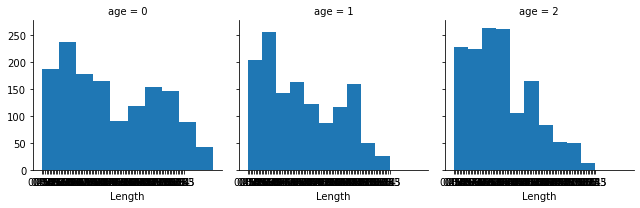

In [166]:
pen = sns.load_dataset('penguins')
dc_pen = pen.to_dict()
print(df_abalone)
abalone_vis = sns.FacetGrid(df_abalone, col="age")
abalone_vis.map(plt.hist, "Length")

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

ValueError: No variables found for grid columns.

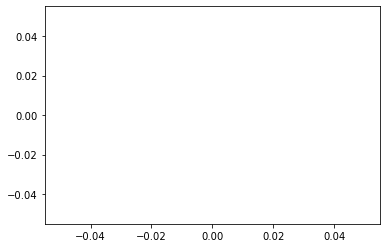

In [167]:
pen = sns.load_dataset('penguins')
print(pen)
print(df_abalone)
plt.plot()
sns.pairplot(data=df_abalone[atr_names],hue="sex", dropna=True)

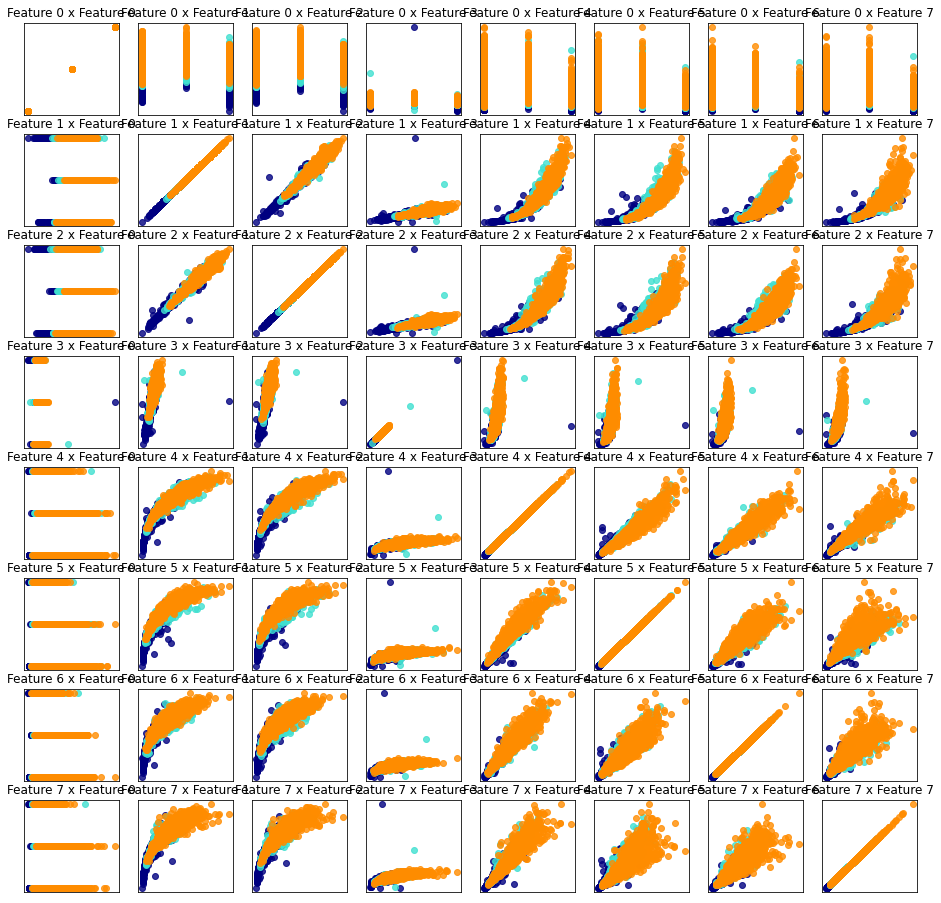

In [152]:
fig = plt.figure(figsize=(16, 16))
plt.title("Scatterplots of the Abalone dataset features")
fig.subplots(nrows=8, ncols=8)
for feat_i in range(num_abalone_features): #We go over all pairs of features (4x4 in this case)
    for feat_j in range(num_abalone_features):  
        ax = plt.subplot(8,8,num_abalone_features*feat_i + feat_j+1)
        # Plot the points
        for color, i, target_name in zip(colors, [0, 1, 2], abalone_classes):
            plt.scatter(abalone_x[abalone_y_class_int == i, feat_i], abalone_x[abalone_y_class_int == i, feat_j], alpha=.8, color=color, label=target_name) #We again extract the feature class specific data using the same method as before and then just use the scatter function
        plt.xticks(())
        plt.yticks(())
        plt.title("Feature "+str(feat_i)+" x Feature "+str(feat_j))
plt.show()

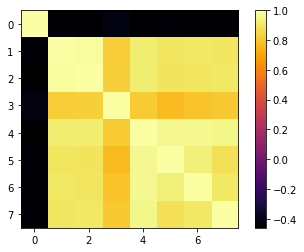

In [104]:
correlation_matrix = np.zeros((num_abalone_features,num_abalone_features))
for i in range(num_abalone_features): #We need a 8x8 matrix to represent the correlation matrix, where we set the value of Cij to be the correlation between the i'th and the j'th metric
    measure = abalone_x[:,i]
    for j in range(num_abalone_features):
        measure2 = abalone_x[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
plt.figure()
plt.imshow(correlation_matrix, cmap = "inferno") #We can draw the matrix using imshow
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'LDA of abalone dataset')

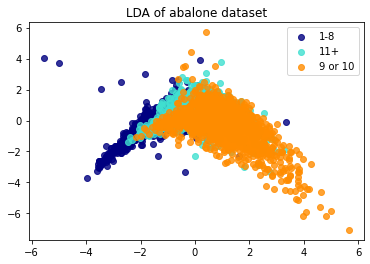

In [153]:
lda = LinearDiscriminantAnalysis(n_components=2) #We set the number of components to 2 so we can transform to a 2D space
X_LDA = lda.fit(abalone_x, abalone_y_class).transform(abalone_x) # We fit the LDA model to X,y with fit() and apply it to X immediately with transform() 
#Note that in LDA, we also give class information when fitting the model since it is a supervised method unlike PCA
plt.figure() #We can again draw the data to a 2D space
for color, i, target_name in zip(colors, [0, 1, 2], abalone_classes):
    plt.scatter(X_LDA[abalone_y_class_int == i, 0], X_LDA[abalone_y_class_int == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of abalone dataset')

In [158]:
X_train, X_test, y_train, y_test = train_test_split(abalone_x, abalone_y_class_int, test_size=0.30, random_state=42) #We split the original dataset (we use a fixed random state such as 42 so we always split the data the same way)
# X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, abalone_y_class, test_size=0.30, random_state=42) #We split the PCA dimensionaly reducted dataset
X_LDA_train, X_LDA_test, y_LDA_train, y_LDA_test = train_test_split(X_LDA, abalone_y_class_int, test_size=0.30, random_state=42) #We split the LDA dimensionaly reducted dataset
# print(X_train)

In [124]:
#LDA model for 3-class age regions
lda = LinearDiscriminantAnalysis() #We initialize the model
lda.fit(X_train, y_train) #We fit the model to the training data X_train and the appropriate class labels y_train
y_pred = lda.predict(X_test) #We get the predictions of the test data X_test using the predict function
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
#To evaluate the accuracy we need to compute the number_of_correct_predictions/number_of_total_predictions
#y_test == y_pred evaluates where the test set labels y_test are equal to the predictions y_pred and returns a vector of 1 (where they are the same) and 0 (where they are different)
#np.sum(y_test == y_pred) just computes the sum of these 1's and 0's giving the total number of correct predictions
#Afterwards we divide this sum with the number of test labels: len(y_test) to get the percentage of correct predictions
#Finally we round the accuracy to the 3rd decimal using np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("LDA accuracy for the original abalone dataset", accuracy) 

LDA accuracy for the original abalone dataset 0.644


In [121]:
# X_train, X_test, y_train, y_test = train_test_split(abalone_x, abalone_y, test_size=0.30, random_state=42) #We split the original dataset (we use a fixed random state such as 42 so we always split the data the same way)
# # X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, abalone_y_class, test_size=0.30, random_state=42) #We split the PCA dimensionaly reducted dataset
# X_LDA = lda.fit(abalone_x, abalone_y).transform(abalone_x) # We fit the LDA model to X,y with fit() and apply it to X immediately with transform() 
# X_LDA_train, X_LDA_test, y_LDA_train, y_LDA_test = train_test_split(X_LDA, abalone_y, test_size=0.30, random_state=42) #We split the LDA dimensionaly reducted dataset
# # print(X_train)
# #LDA model for all cases
# lda = LinearDiscriminantAnalysis() #We initialize the model
# lda.fit(X_train, y_train) #We fit the model to the training data X_train and the appropriate class labels y_train
# y_pred = lda.predict(X_test) #We get the predictions of the test data X_test using the predict function
# accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
# #To evaluate the accuracy we need to compute the number_of_correct_predictions/number_of_total_predictions
# #y_test == y_pred evaluates where the test set labels y_test are equal to the predictions y_pred and returns a vector of 1 (where they are the same) and 0 (where they are different)
# #np.sum(y_test == y_pred) just computes the sum of these 1's and 0's giving the total number of correct predictions
# #Afterwards we divide this sum with the number of test labels: len(y_test) to get the percentage of correct predictions
# #Finally we round the accuracy to the 3rd decimal using np.round(np.sum(y_test == y_pred)/len(y_test),3)
# print("LDA accuracy for the original abalone dataset", accuracy) 

LDA accuracy for the original abalone dataset 0.277


In [125]:
#Naive Bayes model
#The initialization, fitting, predicting and evaluating accuracy is the same as the lda model
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("Naive Bayes accuracy for the original abalone dataset", accuracy)

Naive Bayes accuracy for the original abalone dataset 0.577


LDA accuracy for the LDA dimensionaly reducted abalone dataset 0.644


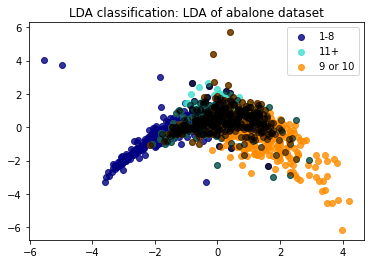

In [159]:
#Initialize the model, fit the training data and predict the test data
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(X_LDA_train, y_LDA_train)
y_pred = lda.predict(X_LDA_test)
print("LDA accuracy for the LDA dimensionaly reducted abalone dataset", np.round(np.sum(y_LDA_test == y_pred)/len(y_LDA_test),3))

#Visualize the test set and the errors which have occured
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], abalone_classes):
    plt.scatter(X_LDA_test[y_LDA_test == i, 0], X_LDA_test[y_LDA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('LDA classification: LDA of abalone dataset')

incorrect = y_pred!=y_LDA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_LDA_test[i][0], X_LDA_test[i][1], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

Naive Bayes accuracy for the LDA dimensionaly reducted abalone dataset 0.623


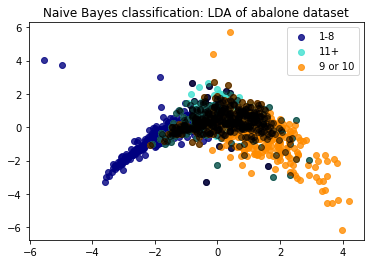

In [160]:
gnb = GaussianNB()
gnb.fit(X_LDA_train, y_LDA_train)
y_pred = gnb.predict(X_LDA_test)
print("Naive Bayes accuracy for the LDA dimensionaly reducted abalone dataset", np.round(np.sum(y_LDA_test == y_pred)/len(y_LDA_test),3))

#Visualize the test set and the errors which have occured
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], abalone_classes):
    plt.scatter(X_LDA_test[y_LDA_test == i, 0], X_LDA_test[y_LDA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('Naive Bayes classification: LDA of abalone dataset')

incorrect = y_pred!=y_LDA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_LDA_test[i][0], X_LDA_test[i][1], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [134]:
qda = QDA()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
print("QDA accuracy for the original abalone dataset:", np.round(np.sum(y_test == y_pred)/len(y_test), 3))

QDA accuracy for the original abalone dataset: 0.621


In [ ]:
qda = QDA()
qda.fit(X_LDA_train, y_LDA_train)
y_pred = qda.predict(X_LDA_test)
print("QDA accuracy for the LDA dimensionaly reducted abalone dataset", np.round(np.sum(y_LDA_test == y_pred)/len(y_LDA_test),3))

#Visualize the test set and the errors which have occured
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], abalone_classes):
    plt.scatter(X_LDA_test[y_LDA_test == i, 0], X_LDA_test[y_LDA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('QDA classification: LDA of abalone dataset')

incorrect = y_pred!=y_LDA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_LDA_test[i][0], X_LDA_test[i][1], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

QDA accuracy for the LDA dimensionaly reducted abalone dataset 0.632


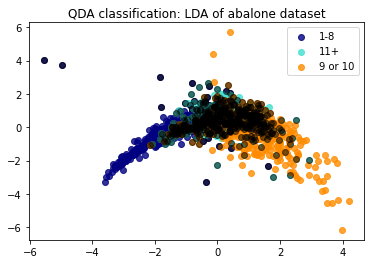